In [ ]:
# Imported the necessary libraries
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import antropy as ant

In [ ]:
# File importing
zip_path = r'C:\Users\90537\Desktop\archive (3).zip'

In [ ]:
#asıl koda güncelleme

def process_sensor_data_and_labels(zip_file_path, folder_name):
    mean_results = []
    entropy_results = []
    label_results = []

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        file_number = 1

        for file_info in zip_ref.infolist():
            if file_info.filename.startswith(folder_name):
                if ('/Train/' not in file_info.filename and folder_name == 'SMNI_CMI_TRAIN/') or \
                   ('/Test/' not in file_info.filename and folder_name == 'SMNI_CMI_TEST/'):

                    file_name = file_info.filename
                    segment_name = file_number
                    file_number += 1

                    with zip_ref.open(file_name) as file:
                        df = pd.read_csv(file)

                        mean_values = df.groupby('sensor position')['sensor value'].mean().reset_index()
                        mean_values['segment'] = segment_name
                        mean_results.append(mean_values)

                        entropy_values = df.groupby('sensor position')['sensor value'].apply(ant.sample_entropy).reset_index()
                        entropy_values['segment'] = segment_name
                        entropy_results.append(entropy_values)

                        subject_identifier_values = df['subject identifier'].unique()
                        if len(subject_identifier_values) == 1:
                            if subject_identifier_values[0] == 'a':
                                label = 1
                            elif subject_identifier_values[0] == 'c':
                                label = 0
                            else:
                                label = None
                        else:
                            label = None

                        label_df = pd.DataFrame({'segment': [segment_name], 'label': [label]})
                        label_results.append(label_df)

    mean_df = pd.concat(mean_results, ignore_index=True)
    mean_data = mean_df.pivot(index='segment', columns='sensor position', values='sensor value')
    mean_data.columns = [f'{col} - mean' if col != 'segment' else col for col in mean_data.columns]

    entropy_df = pd.concat(entropy_results, ignore_index=True)
    entropy_data = entropy_df.pivot(index='segment', columns='sensor position', values='sensor value')
    entropy_data.columns = [f'{col} - antropy' if col != 'segment' else col for col in entropy_data.columns]

    x_data = mean_data.merge(entropy_data, on='segment', how='inner')
    y_data = pd.concat(label_results, ignore_index=True)
    final_df = x_data.merge(y_data, on='segment', how='inner')

    return final_df

In [ ]:
folder_name = "SMNI_CMI_TRAIN/"
train_dataset = process_sensor_data_and_labels(zip_path, folder_name)

train_dataset

,segment,AF1 - mean,AF2 - mean,AF7 - mean,AF8 - mean,AFZ - mean,C1 - mean,C2 - mean,C3 - mean,C4 - mean,...,POZ - antropy,PZ - antropy,T7 - antropy,T8 - antropy,TP7 - antropy,TP8 - antropy,X - antropy,Y - antropy,nd - antropy,label
0,1,3.346762,3.770840,6.015152,6.032277,2.837496,3.204363,1.188238,4.087438,1.048434,...,0.885724,0.904497,1.398926,1.135444,1.309693,1.352569,0.849990,1.172250,1.044908,1
1,2,3.860496,4.041031,2.117160,4.349398,4.715629,-0.187523,0.494633,0.448223,3.005941,...,1.099898,0.720453,1.398129,1.379635,1.192138,1.087871,0.998662,0.989673,1.141784,1
2,3,-1.376488,-1.131687,-2.524676,-0.928871,-1.652395,1.061820,1.883895,-0.132887,2.673453,...,0.610286,0.657833,0.642781,0.639730,0.651313,0.681483,0.620859,0.608394,0.951270,1
3,4,-2.548844,-2.553332,-2.528547,-3.697727,-3.153508,-0.354105,-0.362465,-1.121500,-0.999449,...,0.616968,0.616113,0.555689,0.468242,0.573460,0.586635,0.572670,0.558516,0.649800,1
4,5,-2.878812,-4.148484,-3.618922,-3.002184,-3.610598,-0.848777,-0.273438,0.303906,0.167234,...,0.668490,0.509112,0.591511,0.597837,0.915686,0.646007,0.602584,0.661981,0.940518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,464,-5.331070,-5.720809,-3.571168,-7.019680,-5.779250,-0.733098,-0.639574,-1.397418,-1.503598,...,0.694471,0.565241,0.614973,0.628381,0.624242,0.706204,0.634408,0.687933,0.864547,1
464,465,-11.920934,-12.816121,-16.639098,-11.067719,-12.259820,-1.176855,-1.366875,-2.099375,-3.716777,...,0.534024,0.609309,0.560336,0.578737,0.606030,0.593296,0.499945,0.545501,0.787052,1
465,466,0.147496,1.448277,-0.504852,1.111309,0.371973,-0.634488,-0.596402,-0.073145,0.080789,...,0.727869,0.599370,0.530789,0.540356,0.604506,0.549790,0.558045,0.514642,0.668507,1
466,467,-3.403363,-4.170723,-6.322871,-4.105223,-3.738375,0.043910,-0.049605,0.998160,-0.768027,...,0.618594,0.685927,0.603383,0.622771,0.597570,0.632098,0.591106,0.560754,0.879504,1


In [ ]:
folder_name = "SMNI_CMI_TEST/"
test_dataset = process_sensor_data_and_labels(zip_path, folder_name)

test_dataset

,segment,AF1 - mean,AF2 - mean,AF7 - mean,AF8 - mean,AFZ - mean,C1 - mean,C2 - mean,C3 - mean,C4 - mean,...,POZ - antropy,PZ - antropy,T7 - antropy,T8 - antropy,TP7 - antropy,TP8 - antropy,X - antropy,Y - antropy,nd - antropy,label
0,1,5.852996,5.515375,6.289777,3.754930,5.690852,0.454613,-0.397414,1.399992,-0.631336,...,0.830729,0.695079,0.975467,1.076608,1.377245,1.371604,0.865594,0.979375,0.706681,1
1,2,16.129805,13.134641,20.365395,14.683422,12.795762,0.775621,-0.189469,0.286770,-0.094746,...,0.514652,0.428276,1.169853,1.223775,1.066524,0.788592,0.084209,0.839425,0.190327,1
2,3,6.142941,6.360371,5.610785,7.228207,6.334926,1.352996,0.261883,0.672660,0.570316,...,0.533235,0.554274,0.652935,0.577428,0.633899,0.626191,0.741758,0.640391,0.663756,1
3,4,0.867852,0.096648,-0.569613,-1.187645,-0.892637,0.649695,2.189633,0.605875,2.271008,...,0.609955,0.565095,0.505274,0.574431,0.505922,0.603916,0.600072,0.487625,0.646550,1
4,5,1.680344,1.215012,1.965219,1.638418,1.889555,0.972152,0.284160,1.601520,0.280410,...,0.653974,0.522522,0.614329,0.611194,0.669082,0.766035,0.543702,0.599246,0.734039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,3.697711,5.796426,7.460301,5.074156,4.126238,-0.264480,0.851965,1.532891,1.988055,...,0.513735,0.643528,0.578904,0.643857,0.635700,0.583381,0.678918,0.724339,0.624699,1
476,477,3.403930,2.603520,5.888637,2.727484,3.137617,2.766277,1.677172,3.504430,3.171305,...,0.693147,0.624408,0.577427,0.632005,0.639344,0.613950,0.598319,0.701141,0.923467,1
477,478,3.707266,3.531773,5.556074,3.089238,4.105219,1.419719,1.054086,1.186383,0.621137,...,0.692408,0.550508,0.628992,0.642214,0.685074,0.671001,0.674945,0.532057,0.797263,1
478,479,-3.262188,-3.365828,-3.950117,-4.797617,-3.878289,-0.039957,-2.346012,-0.998180,-3.103230,...,0.602775,0.617211,0.554870,0.650188,0.487646,0.605432,0.661398,0.621807,0.724550,1


In [ ]:
x_train = train_dataset.drop(columns=['label'])
y_train = train_dataset['label']
x_test = test_dataset.drop(columns=['segment'])
y_test = test_dataset['label']

In [ ]:
# Evaluated the performance of different basic classifiers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

x_train = train_dataset.drop(columns=['label', 'segment'])
y_train = train_dataset['label']

x_test = test_dataset.drop(columns=['label', 'segment'])
y_test = test_dataset['label']

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in classifiers.items():
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_predicted)
    print(f"{name} Accuracy: {accuracy:.4f}")


c:\Users\90537\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8500
Decision Tree Accuracy: 0.8646
Random Forest Accuracy: 0.9333
Support Vector Machine Accuracy: 0.6896
K-Nearest Neighbors Accuracy: 0.6333
Naive Bayes Accuracy: 0.7542


c:\Users\90537\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\90537\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

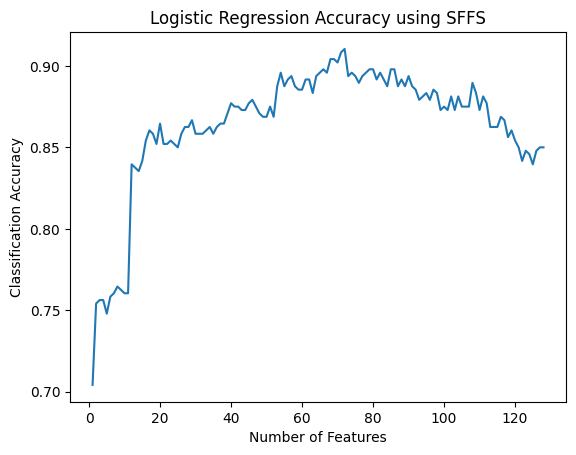

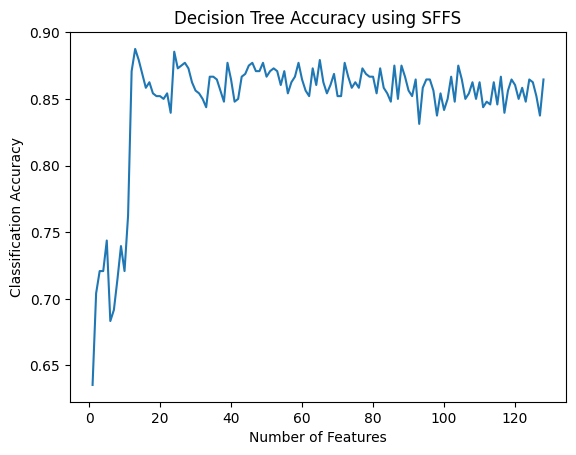

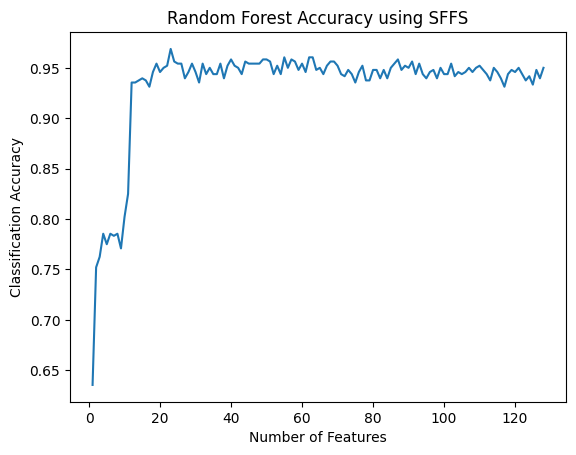

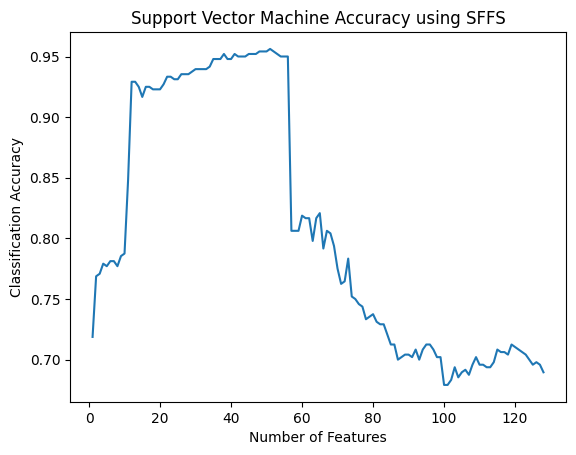

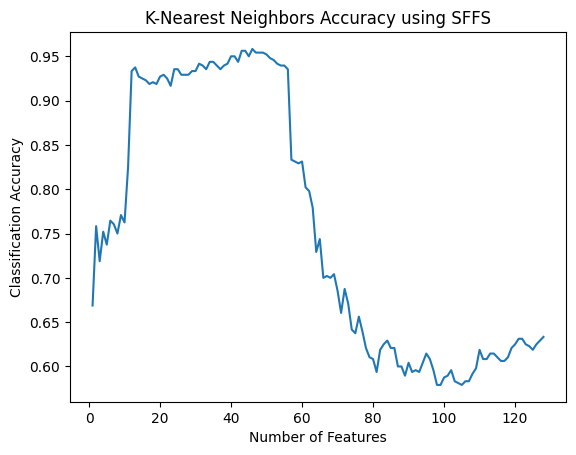

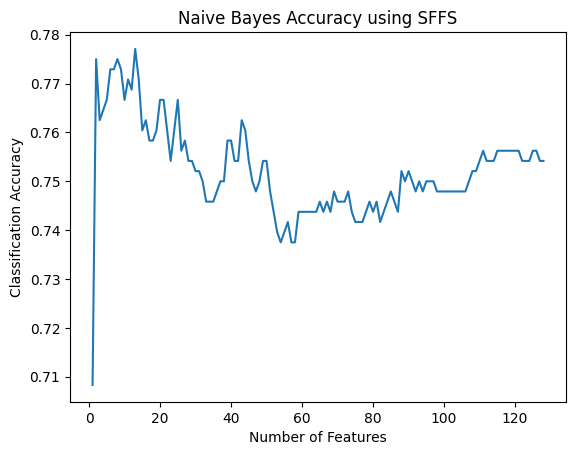

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

for name, model in classifiers.items():
    number_of_features = []
    successes = []

    for k in range(1, x_train.shape[1] + 1):
        kBest = SelectKBest(score_func=f_classif, k=k)

        kBest.fit(x_train,y_train)
        x_train_kbest = kBest.transform(x_train)
        x_test_kbest = kBest.transform(x_test)

        model.fit(x_train_kbest, y_train)
        y_pred = model.predict(x_test_kbest)
        accuracy = accuracy_score(y_test, y_pred)

        number_of_features.append(k)
        successes.append(accuracy)

    plt.plot(number_of_features, successes, linestyle='-')
    plt.title(f'{name} Accuracy using kBest')
    plt.xlabel('Number of Features')
    plt.ylabel('Classification Accuracy')
    plt.show()